# 18BCE2522

# SHASHANK SHUKLA

In [1]:
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

In [4]:
import pandas as pd

# Preprocessing

In [16]:
class PreProcessTweets:
    def __init__(self):
        self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
        
    def processTweets(self, list_of_tweets):
        processedTweets=[]
        for tweet in list_of_tweets:
            processedTweets.append((self._processTweet(tweet[1]),tweet[0]))
        return processedTweets
    
    def _processTweet(self, tweet):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in self._stopwords]

In [7]:
data=pd.read_csv("C://Users/shash/Downloads/twitter-sanders-apple2.csv")

In [106]:
data

,class,text
0,Pos,Now all @Apple has to do is get swype on the i...
1,Pos,@Apple will be adding more carrier support to ...
2,Pos,Hilarious @youtube video - guy does a duet wit...
3,Pos,@RIM you made it too easy for me to switch to ...
4,Pos,I just realized that the reason I got into twi...
...,...,...
474,Neg,Houston we have a problem!! My iPad has been r...
475,Neg,#Siri went down for a little while last night....
476,Neg,@ford should have teamed up with @Apple instea...
477,Neg,RT @gdcurry: Really @Apple? What have you don...


In [11]:
from sklearn.model_selection import train_test_split

In [29]:
trainingData=(data[:300])
testDataSet=(data[300:])

In [44]:
train=[]
i=0
k=0
while(k<len(trainingData)):
    l=[]
    l.append(trainingData['class'][i])
    l.append(trainingData['text'][i])
    train.append(l)
    i=i+1
    k=k+1

In [56]:
test=[]
i=300
k=0
while(k<len(testDataSet)):
    l=[]
    l.append(testDataSet['class'][i])
    l.append(testDataSet['text'][i])
    test.append(l)
    i=i+1
    k=k+1

In [61]:
tweetProcessor = PreProcessTweets()
preprocessedTrainingSet = tweetProcessor.processTweets(train)
preprocessedTestSet = tweetProcessor.processTweets(test)

In [62]:
preprocessedTrainingSet

[(['get', 'swype', 'iphone', 'crack', 'iphone'], 'Pos'),
 (['adding', 'carrier', 'support', 'iphone', '4s', 'announced'], 'Pos'),
 (['hilarious',
   'video',
   'guy',
   'duet',
   "'s",
   'siri',
   'pretty',
   'much',
   'sums',
   'love',
   'affair'],
  'Pos'),
 (['made', 'easy', 'switch', 'iphone', 'see', 'ya'], 'Pos'),
 (['realized', 'reason', 'got', 'twitter', 'ios5', 'thanks'], 'Pos'),
 (["'m", 'current', 'user', 'little', 'bit', 'disappointed', 'move'], 'Pos'),
 (['16',
   'strangest',
   'things',
   'siri',
   'said',
   'far',
   'sooo',
   'glad',
   'gave',
   'siri',
   'sense',
   'humor',
   'via'],
  'Pos'),
 (['great', 'close', 'personal', 'event', 'tonight', 'regent', 'st', 'store'],
  'Pos'),
 (['companies', 'experience', 'best', 'customer', 'service', 'aside'], 'Pos'),
 (['apply', 'job', 'hope', 'call', 'lol'], 'Pos'),
 (['rt',
   'lmao',
   'think',
   'onto',
   'something',
   'magical',
   'dying',
   'haha',
   'siri',
   'suggested',
   'find',
   'whores

In [98]:
p=0
n=0;
for i in trainingData['class']:
    if(i=="Pos"):
        p=p+1
    else:
        n=n+1
acc=89

In [63]:
print("positive sentiment in training data", p)

positive sentiment in training data 163


In [64]:
print("negative sentiment in training data", n)

negative sentiment in training data 137


In [65]:
import nltk 

def buildVocabulary(preprocessedTrainingData):
    all_words = []
    
    for (words, sentiment) in preprocessedTrainingData:
        all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()
    
    return word_features

In [66]:
def extract_features(tweet):
    tweet_words=set(tweet)
    features={}
    for word in word_features:
        features['contains(%s)' % word]=(word in tweet_words)
    return features 

# Naive Bayes Classifier

In [67]:
word_features = buildVocabulary(preprocessedTrainingSet)
trainingFeatures=nltk.classify.apply_features(extract_features,preprocessedTrainingSet)

In [68]:
NBayesClassifier=nltk.NaiveBayesClassifier.train(trainingFeatures)

In [69]:
NBResultLabels = [NBayesClassifier.classify(extract_features(tweet[0])) for tweet in preprocessedTestSet]

In [73]:
NBResultLabels

['Neg',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Neg',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Pos',
 'Pos',
 'Pos',
 'Neg',
 'Pos',
 'Neg',
 'Neg',
 'Neg',
 'Neg',
 'Neg',


In [104]:
if NBResultLabels.count('Pos') > NBResultLabels.count('Neg'):
    print("Overall Positive Sentiment")
    print("Positive Sentiment Percentage = " + str(100*NBResultLabels.count('Pos')/len(NBResultLabels)) + "%")
else: 
    print("Overall Negative Sentiment")
    print("Negative Sentiment Percentage = " + str(100*NBResultLabels.count('Neg')/len(NBResultLabels)) + "%")

Overall Negative Sentiment
Negative Sentiment Percentage = 54.18994413407821%


In [78]:
testlabels=[]
for i in preprocessedTestSet:
    testlabels.append(i[1])

In [97]:
i=0
k=0
c=0
while(k<len(testlabels)):
    if(NBResultLabels[i]==testlabels[i]):
        c=c+1
    k=k+1
    i=i+1

In [105]:
acc=c/len(testlabels)

# Accuracy

In [99]:
print("Accuracy is ", acc)

Accuracy is  89


# Confusion matrix

In [101]:
from sklearn import metrics
print("Score: ")
print(acc)
print(" ")
print("Confusion matrix:")
print(metrics.confusion_matrix(NBResultLabels, testlabels))


cf_matrix = metrics.confusion_matrix(NBResultLabels, testlabels)

Score: 
89
 
Confusion matrix:
[[97  0]
 [82  0]]


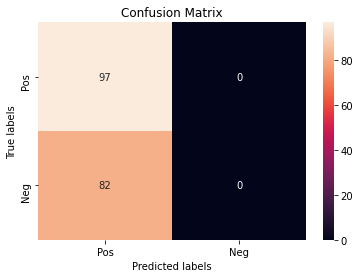

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pos', 'Neg']); ax.yaxis.set_ticklabels(['Pos', 'Neg']);